In [1]:
#models = ['GIN', 'GAT', 'GCNN', 'GatedGCNN']
# note, no twitter.
TUdataset_names = ["RANDOM",'ENZYMES', 'PROTEINS', 'IMDB-BINARY', 'MUTAG', 'COLLAB']
prefixes = ['230909_hparam_maxcut', '230913_hparam_paramhash']

params = ['num_layers', 'TUdataset_name', 'rank']

In [2]:
import os
import json
import pandas as pd
import numpy as np

folder_path = '/home/bcjexu/maxcut-80/bespoke-gnn4do/training_runs'
model_list = [os.path.join(folder_path,x) for x in os.listdir(folder_path) for prefix in prefixes if x.startswith(prefix)]


rows = []
for model_folder in model_list:
    try:
        with open(os.path.join(model_folder, 'params.txt'), 'r') as f:
            model_args = json.load(f)
        
        losses = np.load(os.path.join(model_folder, 'valid_scores.npy'))
        modeldict = {x: model_args[x] for x in params}
        modeldict['scores'] = losses[-1]
        rows.append(modeldict)
        
    except:
        print(f'something is wrong w/ {model_folder}')

In [3]:
df = pd.DataFrame.from_records(rows)

In [4]:
#df = df[df.vc_penalty != 0]

In [5]:
#set(df.vc_penalty)

In [6]:
import seaborn as sns

In [7]:
df

,num_layers,TUdataset_name,rank,scores
0,6,IMDB-BINARY,32,91.225000
1,20,MUTAG,16,29.657895
2,1,MUTAG,4,28.289474
3,4,IMDB-BINARY,2,90.655000
4,10,PROTEINS,8,100.708520
...,...,...,...,...
265,15,MUTAG,4,29.657895
266,3,COLLAB,4,2511.026000
267,1,IMDB-BINARY,4,90.890000
268,20,MUTAG,8,29.657895


In [8]:
#df = df[df['rank'] == 16]

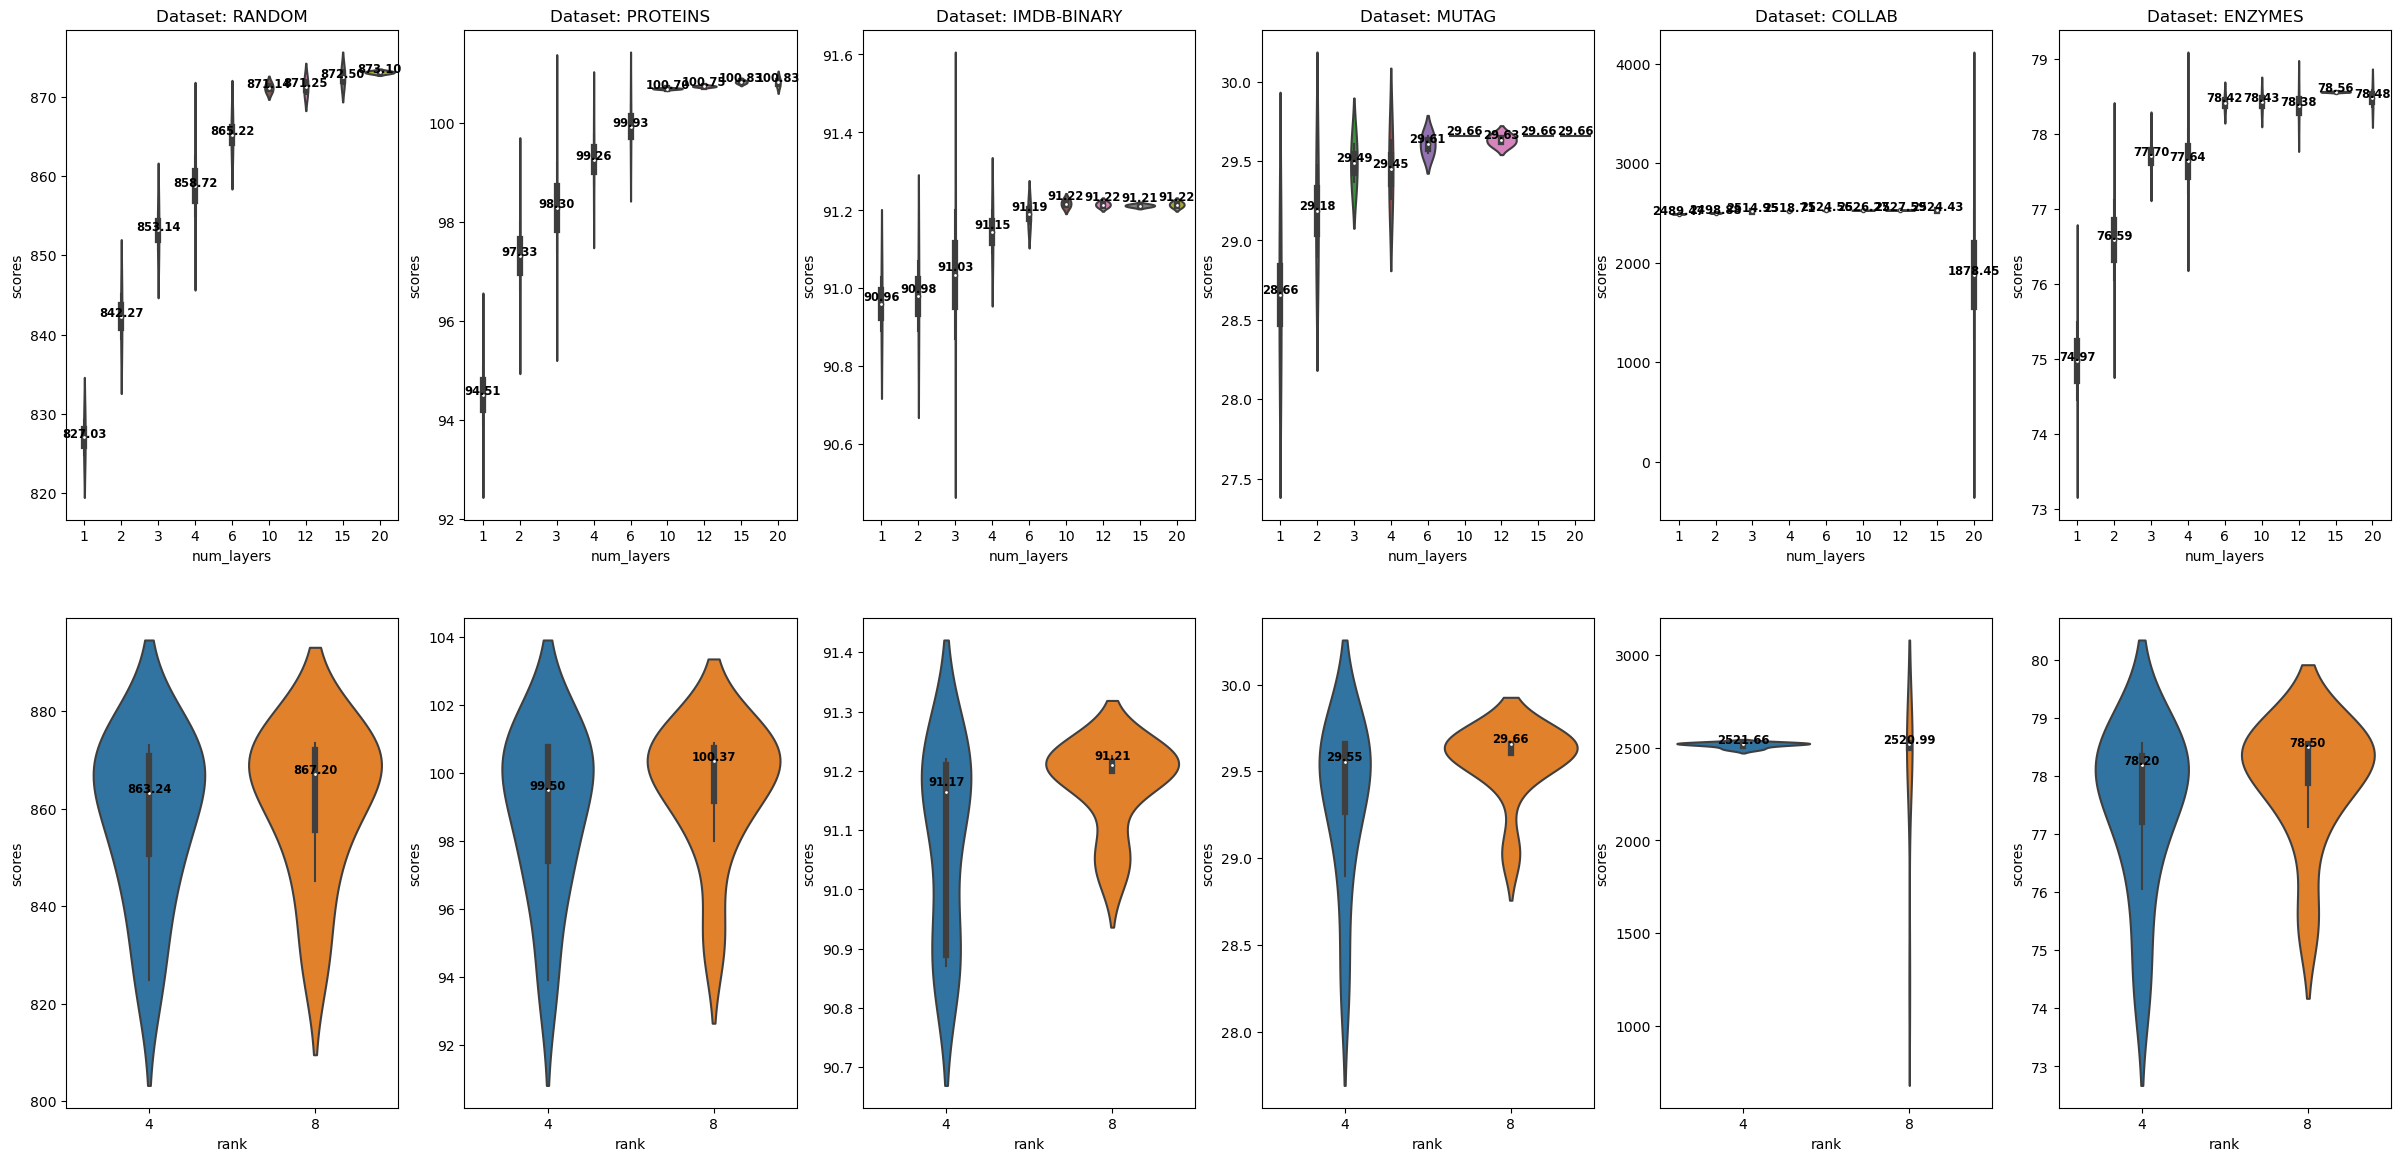

In [12]:
# hparams in rows
# datasets in colums
rows = [x for x in params if x!= "TUdataset_name"]
columns = set(df.TUdataset_name)
import matplotlib.pyplot as plt

fig, axs= plt.subplots(nrows=len(rows), ncols=len(columns), figsize=(30, 14))

for i, x in enumerate(columns):
    dfx = df[(df.TUdataset_name == x) & (df['rank'].isin([4,8]))]
    for j, y_name in enumerate(rows):
        ax = axs[j][i]
        x_vals = dfx[y_name]
        y_vals = dfx['scores']

        sns.violinplot(x=x_vals, y=y_vals, ax=ax)
        medians = dfx.groupby([y_name])['scores'].median()#
        try:
            median_dict = dict(zip([f'{float(x):0.2f}' for x in medians.keys()], medians.values))
        except:
            median_dict = dict(zip([x for x in medians.keys()], medians.values))
        pos = range(len(medians))
        for tick, label in enumerate(ax.get_xticklabels()):
            label = f'{float(label.get_text()):0.2f}'
            #print(median_dict)
            #if median_dict.get(label, None) is not None:
            ax.text(pos[tick], median_dict[label] + 0.01, f'{median_dict[label]:0.2f}',
                        horizontalalignment='center',
                        size='small',
                        color='k',
                        weight='semibold')
    
        if j == 0:
            ax.set(title=f"Dataset: {x}")

plt.show()

In [10]:
df.loc[df.groupby('TUdataset_name')['scores'].idxmax()]

,num_layers,TUdataset_name,rank,scores
243,12,COLLAB,8,2527.962000
63,15,ENZYMES,16,78.608333
0,6,IMDB-BINARY,32,91.225000
1,20,MUTAG,16,29.657895
178,20,PROTEINS,32,101.004484
206,20,RANDOM,32,873.822500
